# Data Collection

First, import the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from scipy import stats
# from statsmodels.formula.api import ols
# import statsmodels.api as sm
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# from statsmodels.stats.multicomp import MultiComparison

## Importing the Data

We're using 'US Accidents' found on kaggle. The data has 3 million rows, but we're focusing on only accidents recorded in 2019.

Data source - https://www.kaggle.com/sobhanmoosavi/us-accidents

In [2]:
USA = pd.read_csv('US_Accidents_Dec19.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
USA.head() # viewing the first 5 rows & all columns for our dataset

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
USA.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In order to see just 2019 records, we are changing our 'Weather_Timestamp' first to a datetime. From there, we changed it to a string and sliced the string after the first 4 digits, giving us the year.

In [6]:
USA['Weather_Timestamp'] =  pd.to_datetime(USA['Weather_Timestamp'])
USA['Weather_Timestamp'].head()

0   2016-02-08 05:58:00
1   2016-02-08 05:51:00
2   2016-02-08 06:56:00
3   2016-02-08 07:38:00
4   2016-02-08 07:53:00
Name: Weather_Timestamp, dtype: datetime64[ns]

In [7]:
var = USA['Weather_Timestamp'].astype('str') # set to a new varaible 'var' before changing our actual dataframe.

In [8]:
USA['Date'] = var.str[:4] # creating a new 'Date' column to represent the year.

In [9]:
USA.columns # checking our columns to make sure our new 'Date' column is there.

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Date'],
      dtype='object')

For this project, we're looking to predict delay time an accident causes. We have the start time and the end time, so we're going to calculate a new column 'Time_Lapse' to capture how long of an accident's delay is.

To start, we treat 'Start_Time' & 'End_Time' the same way we did 'Weather_Timestamp' by converting it to a datetime form an object.

In [10]:
USA['Start_Time'] =  pd.to_datetime(USA['Start_Time'])

In [11]:
USA['End_Time'] =  pd.to_datetime(USA['End_Time'])

Now that we have changed the data type for 'Start_Time' and 'End_Time', it's time to calculate our time lapse for an accident.

In [12]:
USA['Time_Lapse'] = (USA['End_Time'] - USA['Start_Time'])

In [13]:
USA['Time_Lapse'].head(10)

0   05:14:00
1   00:30:00
2   00:30:00
3   00:30:00
4   00:30:00
5   00:30:00
6   00:30:00
7   00:30:00
8   00:30:00
9   00:30:00
Name: Time_Lapse, dtype: timedelta64[ns]

We have our time lapse! But it's not the most functional in it's current data type timedelta64. We want an integer to use in our linear regression model. In order to do so, we'll coerce each row into an integer. The values return to us in nanoseconds (not the most interpertable!) so we divide by 60,000,000,000 (the number of nanoseconds in a minute) to get the total number of minutes for each row.

In [14]:
USA['Time_Lapse'] = USA['Time_Lapse'].astype(int)

In [15]:
USA['Time_Lapse'] = USA['Time_Lapse'].div(60000000000)

Let's check out our new column!

In [16]:
USA['Time_Lapse'].head(10)

0    314.0
1     30.0
2     30.0
3     30.0
4     30.0
5     30.0
6     30.0
7     30.0
8     30.0
9     30.0
Name: Time_Lapse, dtype: float64

## Cleaning the 2019 DataFrame

Great! Now that we have those columns, it's time to filter down to just 2019 observations.

In [62]:
USA.shape

(2974335, 51)

In [63]:
USA_2019 = USA[USA['Date'] == '2019'] # saving down as a new dataframe
USA_2019.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Time_Lapse
512224,A-512230,MapQuest,201.0,2,2019-12-25 09:49:34,2019-12-25 11:03:57,41.848064,-71.062386,NaN,NaN,0.00,Accident on MA-24 near Exit 11 Padelford St.,NaN,MA-24 N,R,Berkley,Bristol,MA,02779,US,US/Eastern,KTAN,2019-12-25 09:52:00,36.0,36.0,59.0,30.20,10.00,WNW,3.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019,74.383333
512225,A-512231,MapQuest,201.0,2,2019-12-25 12:52:38,2019-12-25 13:37:03,42.660690,-71.192589,NaN,NaN,0.00,Accident on I-495 Northbound at HIgh Plain Rd.,NaN,I-93 N,R,Andover,Essex,MA,01810,US,US/Eastern,KLWM,2019-12-25 12:54:00,36.0,36.0,55.0,30.04,10.00,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019,44.416667
512226,A-512232,MapQuest,201.0,2,2019-12-25 20:43:26,2019-12-25 21:58:45,42.157021,-71.069061,NaN,NaN,0.00,Lane blocked due to accident on MA-24 Northbou...,NaN,MA-24 S,R,Stoughton,Norfolk,MA,02072,US,US/Eastern,KOWD,2019-12-25 20:53:00,31.0,31.0,72.0,30.16,10.00,CALM,0.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019,75.316667
512227,A-512233,MapQuest,201.0,2,2019-12-25 20:57:28,2019-12-25 22:07:34,42.338776,-71.276962,NaN,NaN,0.00,Accident on I-90 Eastbound at Ridgeway Rd.,NaN,Ridgeway Rd,R,Weston,Middlesex,MA,02493,US,US/Eastern,KBED,2019-12-25 20:51:00,26.0,26.0,81.0,30.04,10.00,CALM,0.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019,70.100000
512228,A-512234,MapQuest,201.0,3,2019-12-25 07:17:49,2019-12-25 08:49:18,42.379570,-83.200256,NaN,NaN,0.34,Accident on entry ramp to I-96 Westbound from ...,NaN,Edward J Jeffries Fwy,R,Detroit,Wayne,MI,48227,US,US/Eastern,KDET,2019-12-25 06:53:00,32.0,27.0,100.0,29.37,0.25,S,5.0,0.0,Fog,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2019,91.483333


In [64]:
USA_2019.shape

(941940, 51)

We cut out dataset by almost 2/3's by looking at just 2019. Now to clean up even more. We want to check for null values.

In [65]:
USA_2019.isnull().sum()

ID                            0
Source                        0
TMC                      256629
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  685311
End_Lng                  685311
Distance(mi)                  0
Description                   1
Number                   591627
Street                        0
Side                          0
City                         19
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp             0
Temperature(F)             5494
Wind_Chill(F)            137544
Humidity(%)                6576
Pressure(in)               2105
Visibility(mi)             6791
Wind_Direction             8284
Wind_Speed(mph)           48393
Precipitation(in)        207432
Weather_

First things first, we are going to drop the 'End_Lat' and 'End_Lng' columns. A majority of those columns have null values.

In [66]:
USA_2019.drop(columns = ['End_Lat', 'End_Lng'], axis=1, inplace=True)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
USA_2019.shape # down to 49 columns vs 51 prior.

(941940, 49)

In [68]:
# Checking for nulls again now that we've dropped those two columns.

USA_2019.isnull().sum()

ID                            0
Source                        0
TMC                      256629
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   1
Number                   591627
Street                        0
Side                          0
City                         19
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp             0
Temperature(F)             5494
Wind_Chill(F)            137544
Humidity(%)                6576
Pressure(in)               2105
Visibility(mi)             6791
Wind_Direction             8284
Wind_Speed(mph)           48393
Precipitation(in)        207432
Weather_Condition          6593
Amenity                       0
Bump    

In [69]:
# We want to drop null values across all rows for our dataframe so we're looking at a whole dataset.

USA_2019.dropna(inplace=True)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
# Checking the shape one more time!

USA_2019.shape

(212169, 49)

Now that we have our dataset less any null values, we want to check for outliers. We're using our 'Time_Lapse' column as a representation of our data.

In [71]:
USA_2019['Time_Lapse'].describe()

count    212169.000000
mean         80.065753
std         405.638884
min         -30.316667
25%          50.033333
50%          65.950000
75%          91.300000
max      121960.833333
Name: Time_Lapse, dtype: float64

In [72]:
# checking range of data

max_time = USA_2019['Time_Lapse'].max()
min_time = USA_2019['Time_Lapse'].min()

min_time, max_time

(-30.316666666666666, 121960.83333333333)

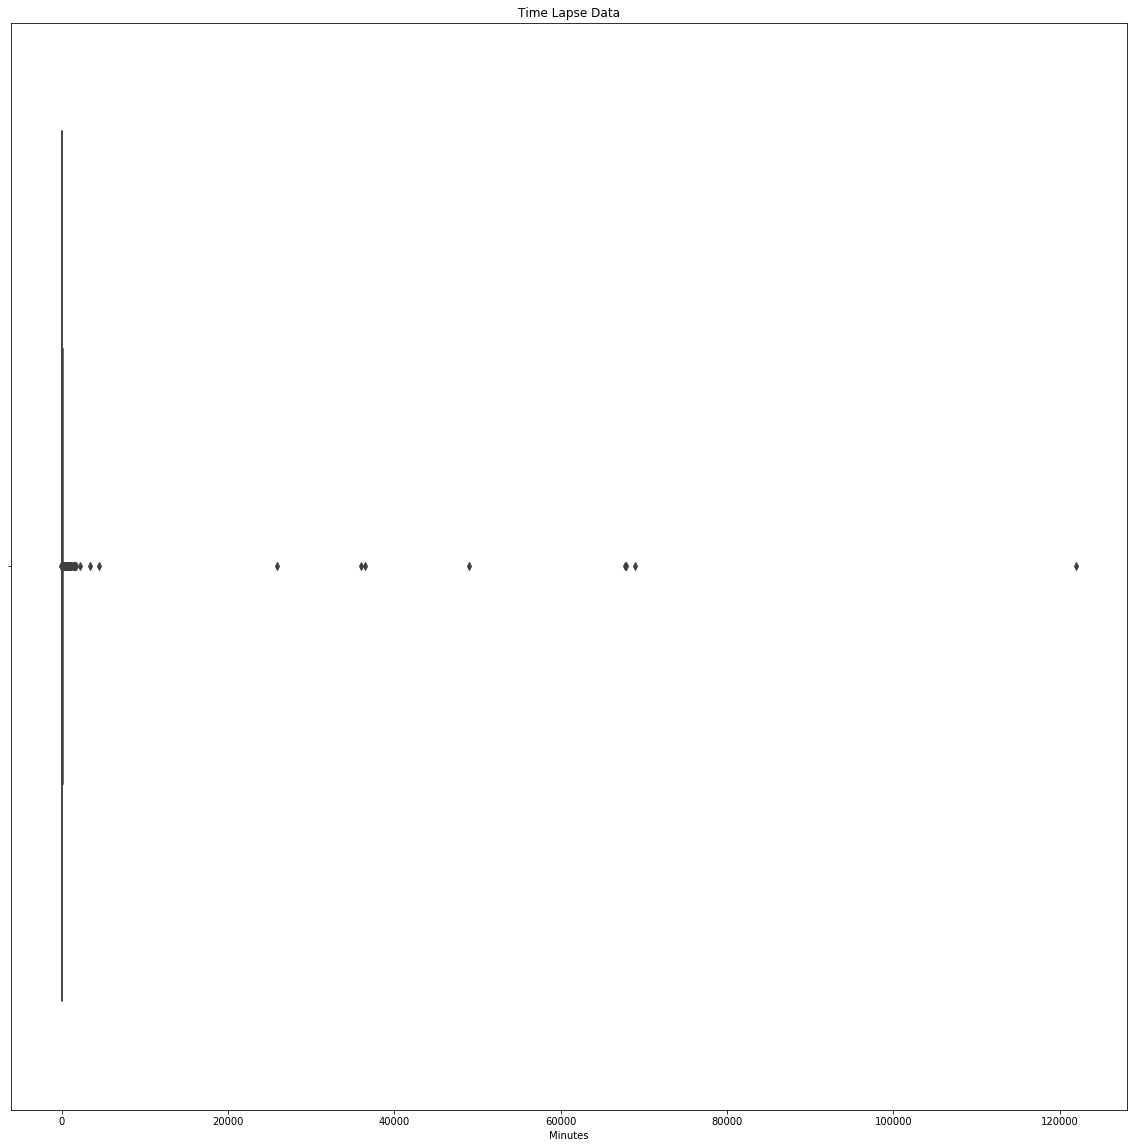

In [73]:
plt.figure(figsize=(20,20))

plt.title('Time Lapse Data')
sns.boxplot(x=USA_2019['Time_Lapse'])
plt.xlabel('Minutes')
plt.show()

Okay, that is ugly! We definitely have some outliers in this data. Our median time in minutes is almost 66, but our mean is 80. Our range runs from -30 (meaning we must have some 'End_Time' that came in as 0) all the way to over 12,000 minutes! That is bananas. Time to lose some outliers! We used the Interquartile Range to address outliers on both sides.

In [74]:
timelapseQ1 = USA_2019['Time_Lapse'].quantile(0.25)
timelapseQ3 = USA_2019['Time_Lapse'].quantile(0.75)
IQR = timelapseQ3 - timelapseQ1
print(IQR)

41.266666666666666


In [75]:
# dropped outliers using IQR

USA_2019 = USA_2019[~((USA_2019['Time_Lapse'] < (timelapseQ1 - 1.5 * IQR)) |(USA_2019['Time_Lapse'] > (timelapseQ3 + 1.5 * IQR)))]
USA_2019.shape

(201272, 49)

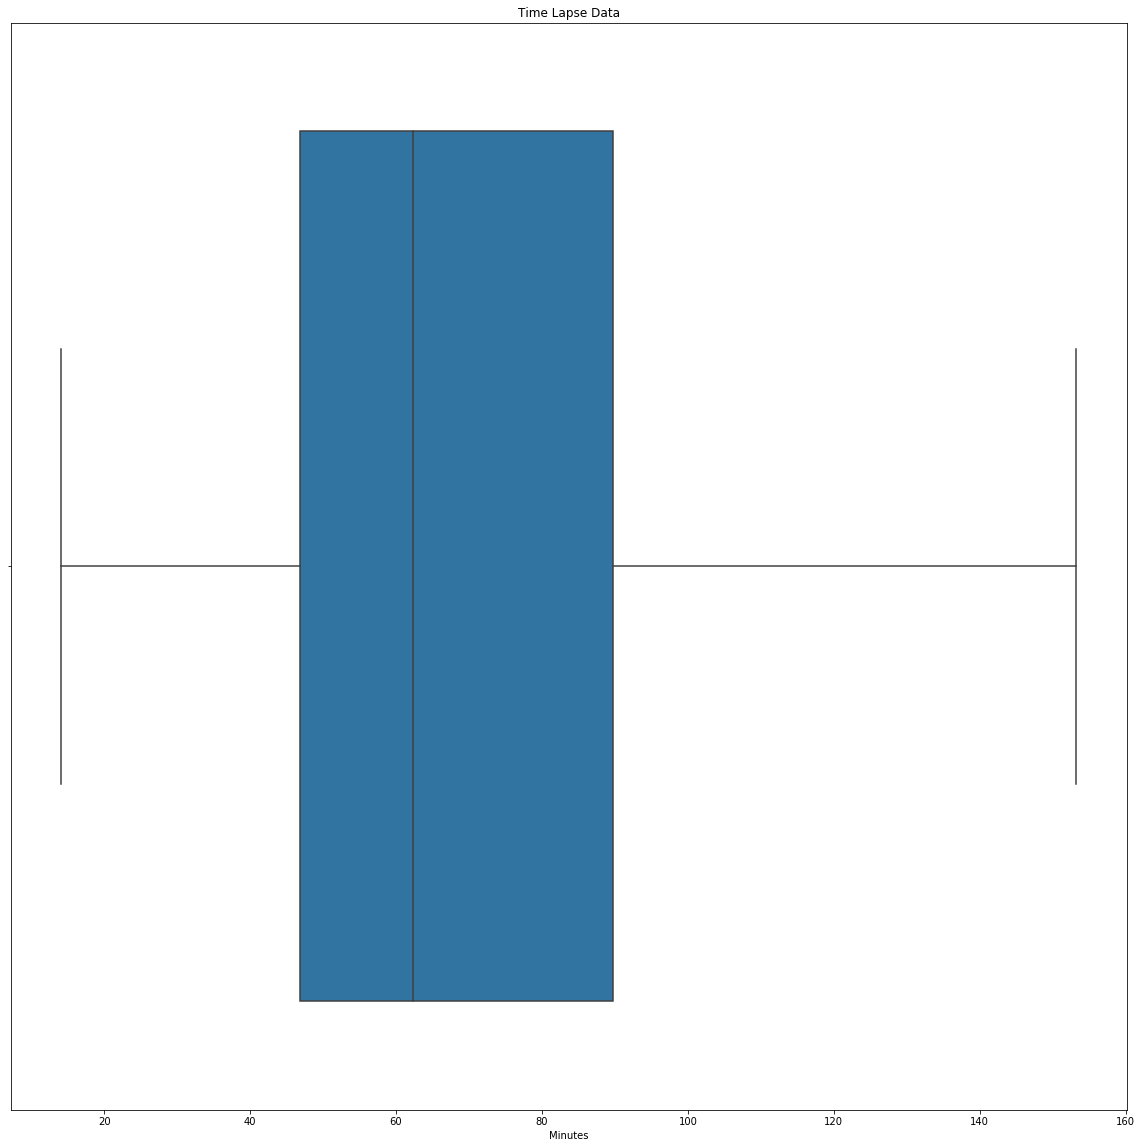

In [76]:
# Let's draw that boxplot again now that we dropped our outliers.

plt.figure(figsize=(20,20))

plt.title('Time Lapse Data')
sns.boxplot(x=USA_2019['Time_Lapse'])
plt.xlabel('Minutes')
plt.show()

So much better! A quick check of our data shows that our new median is 62.3 and the mean is now 70.7 minutes. Our range goes from 14.1 minutes to 153.2 minutes.

In [77]:
USA_2019['Time_Lapse'].describe()

count    201272.000000
mean         70.690753
std          28.626987
min          14.133333
25%          46.850000
50%          62.333333
75%          89.716667
max         153.200000
Name: Time_Lapse, dtype: float64

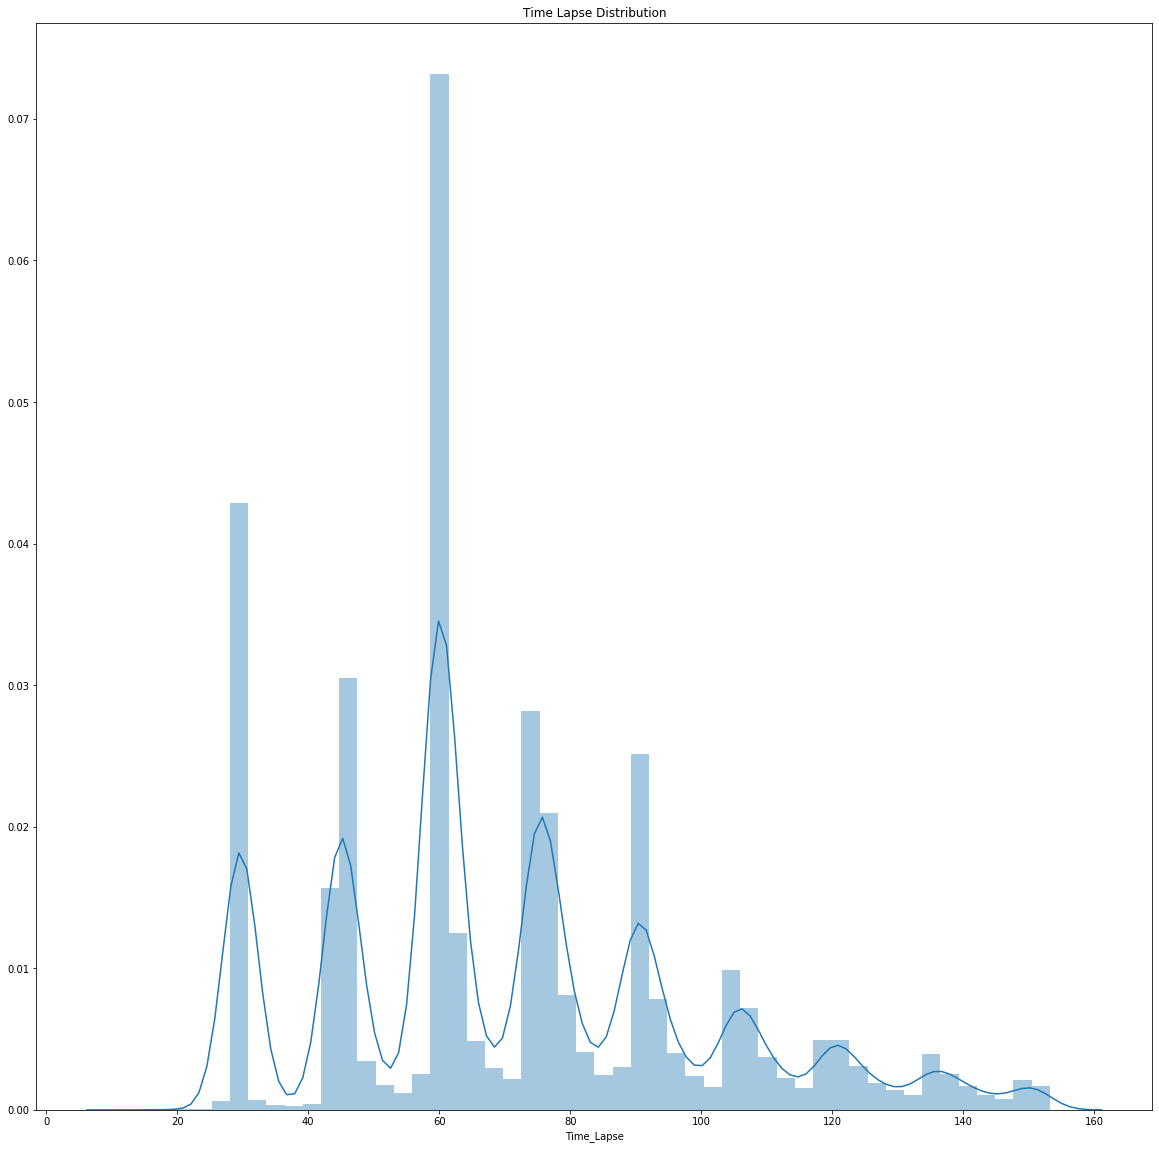

In [78]:
# Checking our distribution.

plt.figure(figsize=(20,20))
plt.title('Time Lapse Distribution')
sns.distplot(USA_2019['Time_Lapse'])
plt.show()

Not a normal distribtion by any means, but because of what we know from the Central Limit Theorem, as we take our test and train samples, the sample will converge to a normal distribution.

## Handling our Categorial Variables

In this dataset, we have a whole bunch of categorial variables that are coming through as strings. We want to update those so they're usable in our model. One way to do that is change the data types in these columns to 'category'. From there, we can use the .cat.codes method to change our strings to integers.

Just to keep a reference, we created dataframes for each categorical column and it's corresponding category code. This way if we need to speak to what state a code represents, we have a look up.

In [79]:
cat_columns = ['State', 'Weather_Condition', 'Wind_Direction', 'Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

In [80]:
# Handling the State column.
state_category_labels = USA_2019[['State']]

In [81]:
state_category_labels['State_Codes'] = state_category_labels['State'].astype('category').cat.codes
state_category_labels.drop_duplicates(inplace=True)

state_category_labels.sort_values(by='State_Codes', inplace=True)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [82]:
# Weather Conidition

wc_category_labels = USA_2019[['Weather_Condition']]
wc_category_labels['WeatherCondition_Codes'] = wc_category_labels['Weather_Condition'].astype('category').cat.codes
wc_category_labels.drop_duplicates(inplace=True)

wc_category_labels.sort_values(by='WeatherCondition_Codes', inplace=True)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [83]:
# Sunrise Sunset

riseset_category_labels = USA_2019[['Sunrise_Sunset']]
riseset_category_labels['SunriseSunset_Codes'] = riseset_category_labels['Sunrise_Sunset'].astype('category').cat.codes
riseset_category_labels.drop_duplicates(inplace=True)

riseset_category_labels.sort_values(by='SunriseSunset_Codes', inplace=True)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [84]:
# Civil Twilight

civil_category_labels = USA_2019[['Civil_Twilight']]
civil_category_labels.columns
civil_category_labels['CivTwilight_Codes'] = civil_category_labels['Civil_Twilight'].astype('category').cat.codes
civil_category_labels.drop_duplicates(inplace=True)

civil_category_labels.sort_values(by='CivTwilight_Codes', inplace=True)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [85]:
# Nautical Twilight

naut_category_labels = USA_2019[['Nautical_Twilight']]
naut_category_labels.columns
naut_category_labels['NautTwilight_Codes'] = naut_category_labels['Nautical_Twilight'].astype('category').cat.codes
naut_category_labels.drop_duplicates(inplace=True)

naut_category_labels.sort_values(by='NautTwilight_Codes', inplace=True)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [86]:
# Astronomical_Twilight

ast_category_labels = USA_2019[['Astronomical_Twilight']]
ast_category_labels.columns
ast_category_labels['AstTwilight_Codes'] = ast_category_labels['Astronomical_Twilight'].astype('category').cat.codes
ast_category_labels.drop_duplicates(inplace=True)

ast_category_labels.sort_values(by='AstTwilight_Codes', inplace=True)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [87]:
# Wind Direction

wind_category_labels = USA_2019[['Wind_Direction']]
wind_category_labels.columns
wind_category_labels['WindDirect_Codes'] = wind_category_labels['Wind_Direction'].astype('category').cat.codes
wind_category_labels.drop_duplicates(inplace=True)

wind_category_labels.sort_values(by='WindDirect_Codes', inplace=True)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [88]:
state_category_labels.to_csv('State_Codes.csv')
wc_category_labels.to_csv('Weather_Condition_Codes.csv')
riseset_category_labels.to_csv('Sunrise_Sunset_Codes.csv')
civil_category_labels.to_csv('Civ_Twilight.csv')
naut_category_labels.to_csv('Naut_Twilight.csv')
ast_category_labels.to_csv('Astro_Twilight.csv')
wind_category_labels.to_csv('Wind_Direction_Codes.csv')

In [89]:
cat_columns = ['State', 'Weather_Condition', 'Wind_Direction','Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

for feat in cat_columns:
    USA_2019[feat] = USA_2019[feat].astype('category')
    USA_2019[feat] = USA_2019[feat].cat.codes

USA_2019[['State', 'Weather_Condition', 'Wind_Direction','Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].head()

,State,Weather_Condition,Wind_Direction,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
512232,20,10,11,1,1,0,0
512234,20,10,0,1,1,1,1
512235,31,10,0,1,1,1,1
512236,31,10,0,0,0,0,0
512237,31,51,0,1,0,0,0


In [90]:
USA_2019['Side'] = np.where(USA_2019['Side'] == 'R', 0, 1)
# converting R to 0 and L to 1
USA_2019['Side'].value_counts()

1    102074
0     99198
Name: Side, dtype: int64

Now that our data is all cleaned and how we want it, it's time to put it as a csv. By doing so, we won't have to re-run all of these cells every time we open up our notebook.

In [91]:
USA_2019.to_csv('2019_US_Accident_Data.csv')